<a href="https://colab.research.google.com/github/Ashraf-Saleheen/For-Upwork/blob/main/Stock_Price_Prediction_AMAZON_Backtest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


In [ ]:
amzn = pd.read_csv('/content/AMZN.csv')

In [ ]:
amzn.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


In [ ]:
amzn.describe( )

,Open,High,Low,Close,Adj Close,Volume
count,5758.000000,5758.000000,5758.000000,5758.000000,5758.000000,5.758000e+03
mean,340.458153,344.156408,336.344390,340.417580,340.417580,7.556094e+06
std,523.365374,528.138556,517.726971,523.140207,523.140207,7.325904e+06
min,1.406250,1.447917,1.312500,1.395833,1.395833,4.872000e+05
25%,37.460001,38.334999,36.812499,37.562500,37.562500,3.685525e+06
50%,81.965000,83.520000,79.875000,81.599998,81.599998,5.692450e+06
75%,335.267494,337.537491,331.727501,334.290001,334.290001,8.594350e+06
max,2173.070068,2185.949951,2161.120117,2170.219971,2170.219971,1.043292e+08


In [ ]:
amzn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5758 entries, 0 to 5757
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5758 non-null   object 
 1   Open       5758 non-null   float64
 2   High       5758 non-null   float64
 3   Low        5758 non-null   float64
 4   Close      5758 non-null   float64
 5   Adj Close  5758 non-null   float64
 6   Volume     5758 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 315.0+ KB


### We can see the Date is an object and we need to change it to DateTime format.

In [ ]:
amzn['Date'] = pd.to_datetime(amzn['Date'])

### Now we need to set the index as Date

In [ ]:
amzn.set_index('Date', inplace=True)

### We are going to create a fresh column by subtracting the Open column from the Close column.

In [ ]:
amzn['diff']= amzn['Open']-amzn['Close']

### Now we will import necessary Library to visualize stock price.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

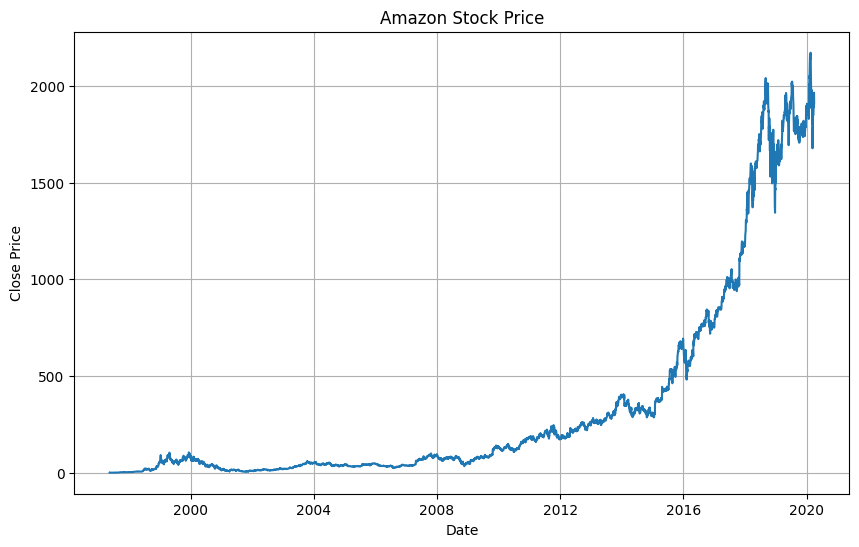

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(amzn['Close'])
plt.grid()
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Amazon Stock Price')
plt.show()

### Now we will locate a certain time frame/stamp and for that we will use the slicing operation.

In [ ]:
amzn = amzn.loc[pd.Timestamp('2017-01-01'):pd.Timestamp('2020-12-31')]

In [ ]:
amzn.tail()

,Open,High,Low,Close,Adj Close,Volume,diff
Date,,,,,,,
2020-03-26,1902.000000,1956.489990,1889.290039,1955.489990,1955.489990,6221300,-53.489990
2020-03-27,1930.859985,1939.790039,1899.920044,1900.099976,1900.099976,5387900,30.760010
2020-03-30,1922.829956,1973.630005,1912.339966,1963.949951,1963.949951,6126100,-41.119995
2020-03-31,1964.349976,1993.020020,1944.010010,1949.719971,1949.719971,5123600,14.630005
2020-04-01,1932.969971,1944.959961,1893.000000,1907.699951,1907.699951,4111100,25.270020


### Let's visualize the latest time which is in our case 2017 to 2020.

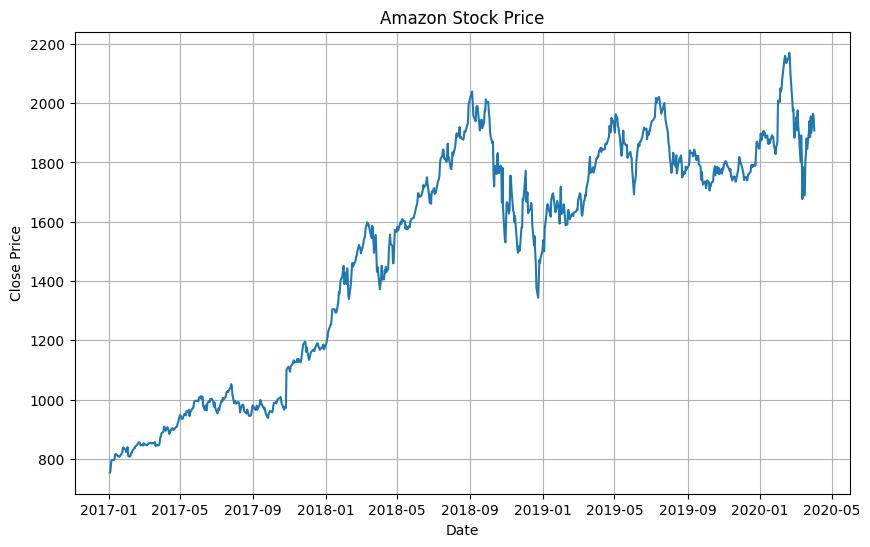

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(amzn['Close'])
plt.grid()
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Amazon Stock Price')
plt.show()

### Now we are going to create a Daily CLose, which is the Adj Close column. And we are also going to find the %(pct) change from last day to next day.

In [ ]:
daily_close = amzn['Adj Close']
daily_pct_change = daily_close.pct_change()
daily_pct_change.fillna(0, inplace=True)
daily_pct_change.head()

,Adj Close
Date,
2017-01-03,0.000000
2017-01-04,0.004657
2017-01-05,0.030732
2017-01-06,0.019912
2017-01-09,0.001168


### Lets plot this adjusted close price.

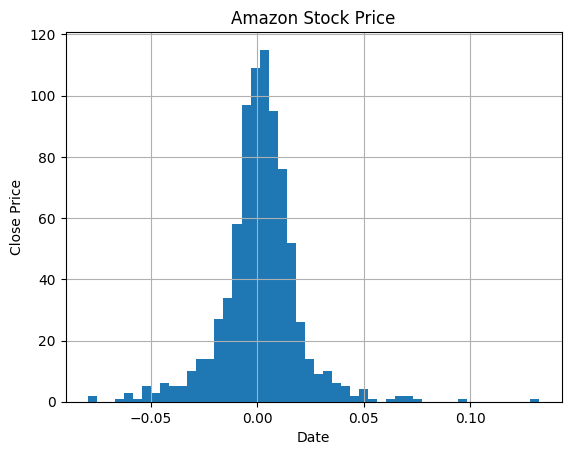

In [ ]:
daily_pct_change.hist(bins=50)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Amazon Stock Price')
plt.show()

### We can also have the scatter plot to see.

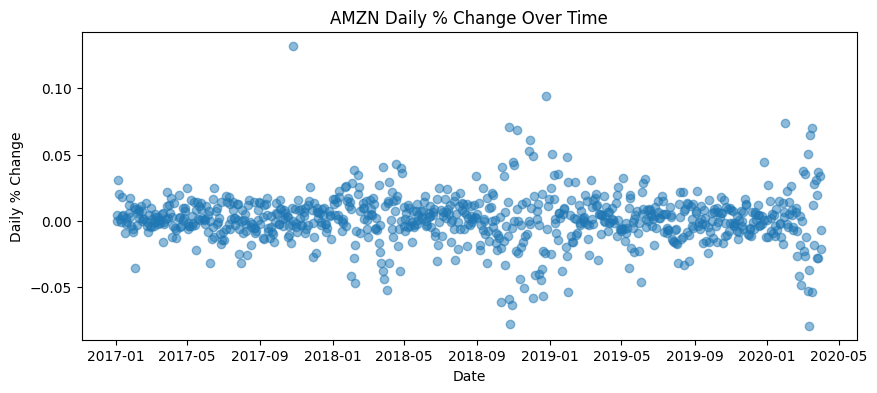

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 4))
plt.scatter(daily_pct_change.index, daily_pct_change.values, alpha=0.5)
plt.title("AMZN Daily % Change Over Time")
plt.xlabel("Date")
plt.ylabel("Daily % Change")
plt.show()


### Now we are going to work with the moving average.

### In finance we know the moving average (MA) is a stock indicator commonly used in technical analysis. The reason for calculating the moving average of a stock is to help smooth out the price data by creating a constantly updated average price. By calculating the moving average, the impacts of random, short term fluctuations on the price of a stock over a specified time frame are mitigated.


### SMA Vs EMA

#### The exponential moving average gives more weight to recent prices in an attempt to make them more responsive to new information. To calculate an EMA, the simple moving average (SMA) over a particular period is calculated first.

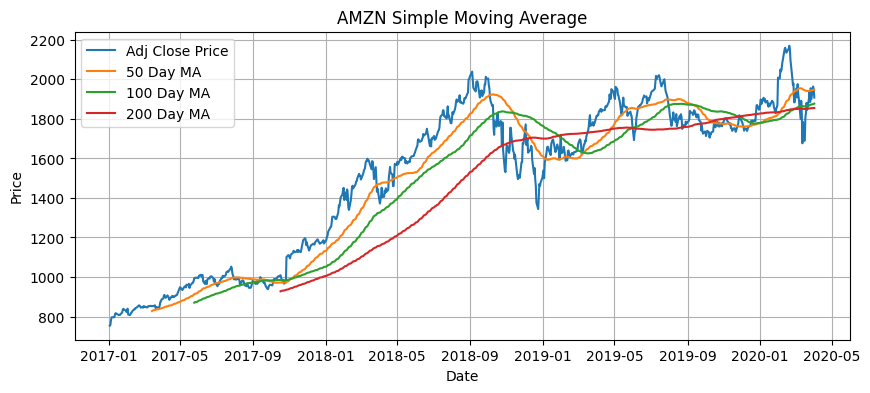

In [ ]:
adj_close_px = amzn['Adj Close']
amzn['50'] = adj_close_px.rolling(window=50).mean()
amzn['100'] = adj_close_px.rolling(window=100).mean()
amzn['200'] = adj_close_px.rolling(window=200).mean()

plt.figure(figsize=(10, 4))
plt.plot(amzn['Adj Close'], label='Adj Close Price')
plt.plot(amzn['50'], label='50 Day MA')
plt.plot(amzn['100'], label='100 Day MA')
plt.plot(amzn['200'], label='200 Day MA')
plt.title("AMZN Simple Moving Average")
plt.grid()
plt.legend()
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

### Mark that the 50 day moving average started after 50 days as it needs the first 50 days moving average whicle 100 SMA started after 100day and 200 day after 200days.

### Now we will plot the EMA

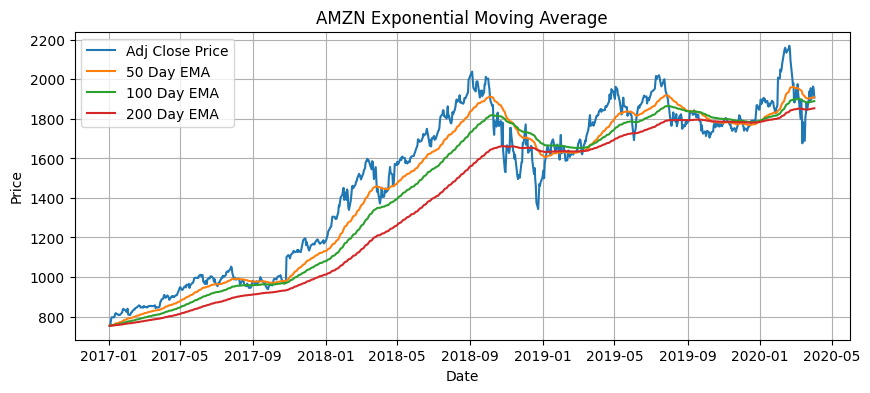

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(amzn['Adj Close'], label='Adj Close Price')
plt.plot(adj_close_px.ewm(span=50, adjust=False).mean(), label='50 Day EMA')
plt.plot(adj_close_px.ewm(span=100, adjust=False).mean(), label='100 Day EMA')
plt.plot(adj_close_px.ewm(span=200, adjust=False).mean(), label='200 Day EMA')
plt.title("AMZN Exponential Moving Average")
plt.grid()
plt.legend()
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

### Now we will do the volatility calculation.

#### The volatility of a stock is a measurement of the change in variance in a stock's return over a specific period. We can compare the volatilities of stocks to examine which are riskier.

In [ ]:
import numpy as np

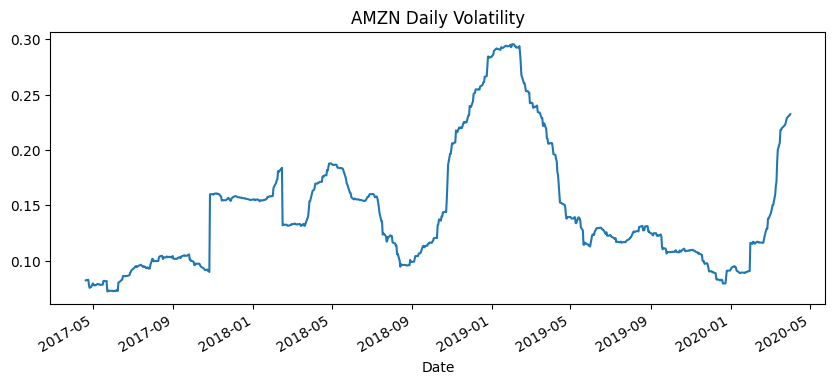

In [ ]:
min_periods = 75
vol = daily_pct_change.rolling(min_periods).std() * np.sqrt(min_periods)
vol.plot(figsize=(10, 4), title='AMZN Daily Volatility')
plt.show()

### Now we will set a strategy.

## Trading Strategy.

### Among short and long term EMAs, they discover that trading the crossovers of the 13-day and 48.5 day averages produced the largest returns. Buying the average 13/48.5 day 'Golden Cross' produced an average 94 day 4.90 percent gain better returns than any other combination.

In [ ]:
start_window = 13
long_window = 49

signals = pd.DataFrame(index=amzn.index)
signals['signal'] = 0.0

signals['short_mavg'] = amzn['Adj Close'].rolling(window=start_window, min_periods=1, center=False).mean()
signals['long_mavg'] = amzn['Adj Close'].rolling(window=long_window, min_periods=1, center=False).mean()

signals['signal'][start_window:] = np.where(signals['short_mavg'][start_window:]
                                            > signals['long_mavg'][start_window:], 1.0, 0.0)

signals['positions'] = signals['signal'].diff()


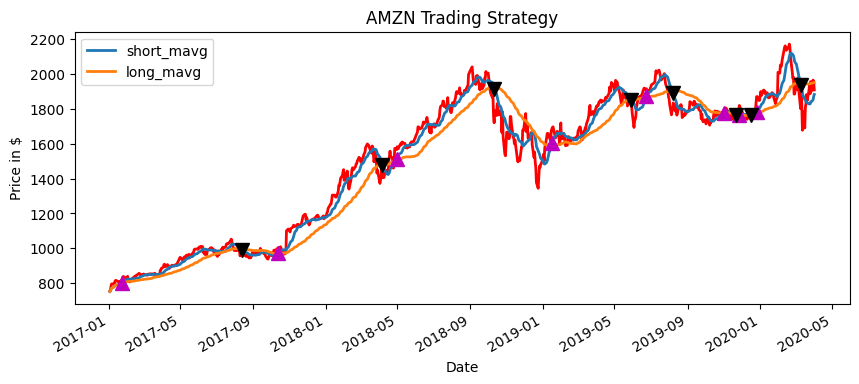

In [ ]:
fig=plt.figure(figsize=(10,4))
ax1=fig.add_subplot(111, ylabel='Price in $')
amzn['Adj Close'].plot(ax=ax1, color='r', lw=2.)
signals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)
ax1.plot(signals.loc[signals.positions ==1.0].index, signals.short_mavg[signals.positions ==1.0], '^', markersize=10, color='m')
ax1.plot(signals.loc[signals.positions ==-1.0].index, signals.short_mavg[signals.positions ==-1.0], 'v', markersize=10, color='k')
plt.title('AMZN Trading Strategy')
plt.show()


### Now we will check he Backtesting

#### Backtesting serves to calculate the performace of our strategy.

In [ ]:
intitial_capital = float(100000.0)
positions = pd.DataFrame(index=signals.index).fillna(0.0)
positions['AMZN'] = 100*signals['signal']
portfolio = pd.DataFrame(index=signals.index).fillna(0.0)
pos_diff = positions.diff()

portfolio['holdings'] = (positions.multiply(amzn['Adj Close'], axis=0))
portfolio['cash'] = intitial_capital - (pos_diff.multiply(amzn['Adj Close'], axis=0)).cumsum()
portfolio['total'] = portfolio['cash'] + portfolio['holdings']
portfolio['returns'] = portfolio['total'].pct_change()


In [ ]:
portfolio.tail()

,holdings,cash,total,returns
Date,,,,
2020-03-26,0.0,167120.983887,167120.983887,0.0
2020-03-27,0.0,167120.983887,167120.983887,0.0
2020-03-30,0.0,167120.983887,167120.983887,0.0
2020-03-31,0.0,167120.983887,167120.983887,0.0
2020-04-01,0.0,167120.983887,167120.983887,0.0


### Visualizing the strategy result

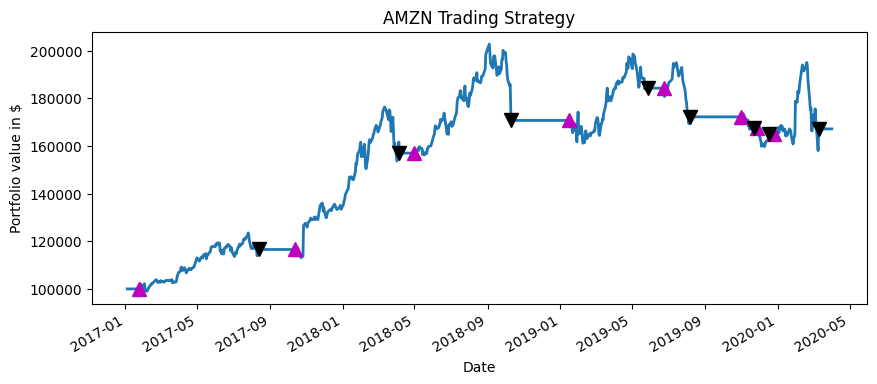

In [ ]:
fig = plt.figure(figsize=(10, 4))
ax1 = fig.add_subplot(111, ylabel='Portfolio value in $')
portfolio['total'].plot(ax=ax1, lw=2.)
ax1.plot(portfolio.loc[signals.positions == 1.0].
         index, portfolio.total[signals.positions == 1.0], '^', markersize=10, color='m')
ax1.plot(portfolio.loc[signals.positions == -1.0].
         index, portfolio.total[signals.positions == -1.0], 'v', markersize=10, color='k')
plt.title('AMZN Trading Strategy')
plt.show()